In [1]:
%load_ext autoreload
%autoreload 2

# Colab setup 

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
root_path = "/content/drive/My Drive/" # for colab

In [7]:
root_path = "./" # locally

### Check GPU devices

In [6]:
from tensorflow.python.client import device_lib
[x for x in device_lib.list_local_devices() if x.device_type == 'GPU']

[]

### Clone github repo and download data

In [ ]:
! git clone https://github.com/nabacg/aml-nlp-notes.git

In [ ]:
import os 
print(os.getcwd())
[n for n in dir(os) if 'ch' in n]
os.chdir('/content/aml-nlp-notes/language-model')
print(os.getcwd())

### copy starspace embedding file

In [ ]:
! cp $root_path"starspace_embeddings/starspace_embeddings.tsv" data

### Cornell dataset

In [ ]:
! sh download_cornell.sh

# Imports

In [50]:
import tensorflow as tf
import os
import numpy as np
from seq2seqdataprocessing import load_dataset, word_to_idx, create_dataset
from language_model import Encoder, Decoder, train_model, gen_answer, load_embeddings, create_checkpoints, create_models

## Hyperparams

In [56]:
BATCH_SIZE = 128
embedding_dim = 256
units = 1024  # RNN size
max_vocab_size = 21872  # why 21872 that's the full vocab for seqs of length 40 # why 23106 ? because that covers ~99% of vocabulary for Cornell
max_length = 50

In [39]:
checkpoint_dir = root_path + "cornell-ds-40"

## Datasets 

In [57]:
dataset, validation_ds, word2idx, idx2word = create_dataset(BATCH_SIZE,
                                                  dataset_name = 'cornell', 
                                                  max_sentence_length= max_length, 
                                                  vocab_size=max_vocab_size)
vocab_size = len(word2idx)

100%|██████████| 83097/83097 [00:05<00:00, 16552.54it/s]


In [58]:
len(word2idx), max_vocab_size

(17193, 21872)

## Models

In [59]:
encoder, decoder, optimizer = create_models(vocab_size, 
                                            word2idx, 
                                            units, 
                                            BATCH_SIZE, 
                                            None, #'data/starspace_embeddings.tsv', 
                                            embedding_dim)

In [44]:
checkpoint, manager = create_checkpoints(encoder, decoder, optimizer, checkpoint_dir)

In [45]:
checkpoint.restore(manager.latest_checkpoint)

In [46]:
checkpoint.restore(root_path + "cornell-40/ckpt-25")

# Training

In [ ]:
train_model(encoder, 
            decoder, 
            optimizer,
            dataset, 
            BATCH_SIZE, 
            N_BATCH,
            start_word_index=word_to_idx(word2idx, '<start>'),
            epochs=10,
            save_checkpoint=lambda: manager.save())

## Save model

In [ ]:
save_path =  root_path + "saved-models-cornell-40/"
tf.saved_model.save(encoder, save_path + "encoder")
tf.saved_model.save(decoder, save_path + "decoder")

## Evaluate

Instructions for updating:
Colocations handled automatically by placer.
Input: <start> hi <end>
Answer: squares prevention parading squares prevention parading squares prevention parading squares prevention parading squares prevention parading 


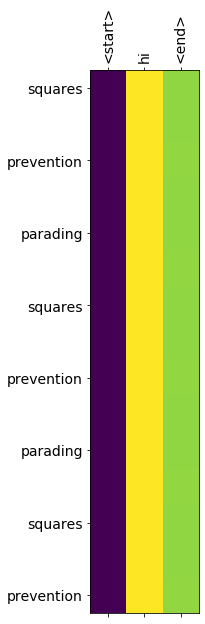

'squares prevention parading squares prevention parading squares prevention parading squares prevention parading squares prevention parading '

In [48]:
gen_answer("Hi", encoder, decoder, word2idx, idx2word, units, max_length=15, print_debug=True)

In [ ]:
answer = create_bot(encoder, decoder, word2idx, idx2word, units, 10)

In [ ]:
qs = ['Hey',
      "What is your name?",
 'How are you doing?',
 "What's your hobby?",
 "Where are you now?",
 "Which city do you live in?",
 "Which country do you live in?",
 "Which country do you live in now?",
 'What is an AI?',
 'What is the meaning of life?']

In [ ]:
for q in qs:
    print("q: ", q)
    print("a: ", answer(q))answer("hi")